# House Pricing Regression Analysis using Lasso and Ridge regularization

### Solution is divided into below sections
1. Understanding and exploring the data
2. Data Cleaning
3. Data preparation
4. Model building and evaluation
5. Solution for some of the subjective questions

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
house_1 = pd.read_csv("train.csv")
house_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(house_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_1.shape

(1460, 81)

## Data Cleaning

In [6]:
print(round(house_1.isnull().sum().sort_values(ascending=False)/1460 * 100,2))

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

We will drop the columns that have more than 30% missing values

In [7]:
house_1.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1, inplace=True)

In [8]:
house_1.shape

(1460, 76)

There are columns which are having null values < 6%. We can straight away drop those rows.

In [9]:
house_1 = house_1.dropna()

In [10]:
house_1.shape

(1094, 76)

We have one column which needs to be treated for missing values.

In [11]:
house_1.LotFrontage.value_counts(normalize=True)

60.0     0.109689
80.0     0.061243
70.0     0.057587
75.0     0.045704
50.0     0.044790
65.0     0.037477
85.0     0.034735
78.0     0.022852
90.0     0.020110
24.0     0.017367
68.0     0.016453
79.0     0.015539
21.0     0.015539
73.0     0.015539
64.0     0.013711
72.0     0.013711
66.0     0.013711
100.0    0.013711
63.0     0.012797
74.0     0.012797
51.0     0.011883
52.0     0.011883
59.0     0.011883
57.0     0.010969
82.0     0.010969
43.0     0.010969
71.0     0.010969
76.0     0.010055
69.0     0.010055
55.0     0.010055
53.0     0.009141
40.0     0.009141
86.0     0.009141
88.0     0.009141
34.0     0.009141
84.0     0.008227
44.0     0.008227
98.0     0.007313
61.0     0.007313
96.0     0.007313
93.0     0.007313
92.0     0.007313
62.0     0.007313
120.0    0.006399
77.0     0.006399
67.0     0.006399
35.0     0.005484
36.0     0.005484
107.0    0.005484
41.0     0.005484
95.0     0.005484
48.0     0.005484
110.0    0.005484
89.0     0.005484
30.0     0.005484
91.0     0

For LotFrontage let's replace null value with the median value

In [12]:
median_lotfrontage = house_1.LotFrontage.median()
median_lotfrontage

70.0

In [13]:
house_1["LotFrontage"] = house_1["LotFrontage"].fillna(median_lotfrontage)

In [14]:
house_1.LotFrontage.isnull().sum()

0

In [15]:
print(house_1.isnull().sum().sort_values(ascending=False))

Id               0
FullBath         0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
BsmtHalfBath     0
MSSubClass       0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
CentralAir       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
HeatingQC        0
Heating          0
TotalBsmtSF      0
YearBuilt        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street      

In [16]:
house_1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,727.375686,56.128885,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,45.252285,606.117002,1099.561243,1173.809872,356.536563,4.680987,1535.027422,0.423218,0.056673,1.577697,0.389397,2.861974,1.033821,6.570384,0.610603,1978.565814,1.879342,503.760512,94.341865,46.946984,22.053016,3.266910,16.498172,3.007313,23.550274,6.335466,2007.786106,187033.263254
std,420.955488,41.976345,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,159.075003,445.834636,415.851262,387.677463,439.260130,42.099821,526.124028,0.514253,0.235244,0.550219,0.500793,0.764107,0.185841,1.584486,0.633118,25.934444,0.658586,192.261314,122.624615,64.820019,61.570502,29.655973,58.455303,40.713175,167.135237,2.694558,1.334307,83165.332151
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,366.500000,20.000000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,270.000000,816.000000,894.000000,0.000000,0.000000,1164.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000
50%,723.500000,50.000000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,0.000000,525.000000,1023.000000,1097.000000,0.000000,0.000000,1480.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1982.000000,2.000000,484.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165750.000000
75%,1093.750000,70.000000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,0.000000,846.000000,1345.500000,1413.500000,729.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,602.500000,169.750000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,221000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


In [17]:
house_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

Dropping column ID as it is unique for each row

In [18]:
house_1.drop(['Id'], axis=1, inplace=True)

In [19]:
house_1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## Data Exploration

In [20]:
house_1_Obj = house_1.select_dtypes(['object'])

In [21]:
house_1_Obj.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [22]:
for col in house_1_Obj.columns.array:
    print(house_1_Obj[col].astype('category').value_counts(normalize=True)*100)

RL         77.696527
RM         15.813528
FV          4.936015
RH          0.822669
C (all)     0.731261
Name: MSZoning, dtype: float64
Pave    99.634369
Grvl     0.365631
Name: Street, dtype: float64
Reg    69.469835
IR1    27.513711
IR2     2.376600
IR3     0.639854
Name: LotShape, dtype: float64
Lvl    90.585009
Bnk     4.113346
HLS     4.021938
Low     1.279707
Name: LandContour, dtype: float64
AllPub    100.0
Name: Utilities, dtype: float64
Inside     75.868373
Corner     17.093236
CulDSac     4.021938
FR2         2.650823
FR3         0.365631
Name: LotConfig, dtype: float64
Gtl    95.521024
Mod     4.021938
Sev     0.457038
Name: LandSlope, dtype: float64
NAmes      15.813528
CollgCr    11.151737
OldTown     8.775137
Somerst     6.855576
NridgHt     6.764168
Edwards     5.941499
Gilbert     4.478976
NWAmes      4.113346
Sawyer      4.021938
SawyerW     4.021938
BrkSide     3.839122
Crawfor     3.747715
NoRidge     3.016453
Mitchel     2.742230
Timber      2.650823
IDOTRR      2.4

Lets visualize the categorical data using countplots

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

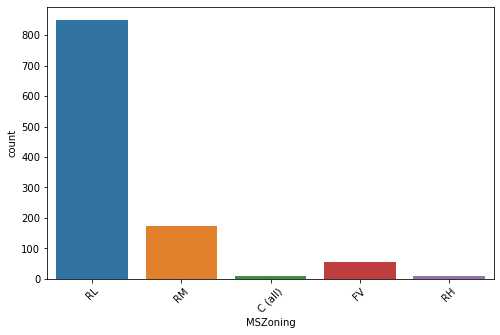

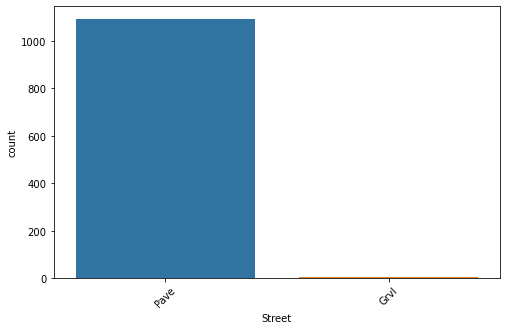

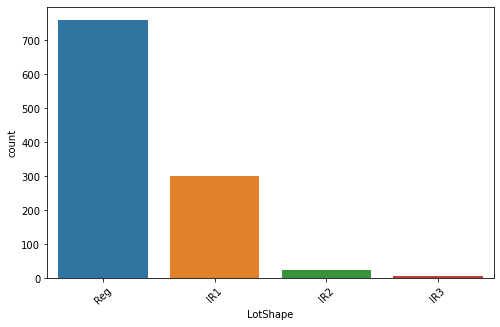

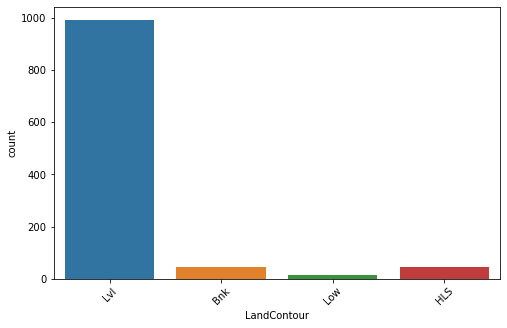

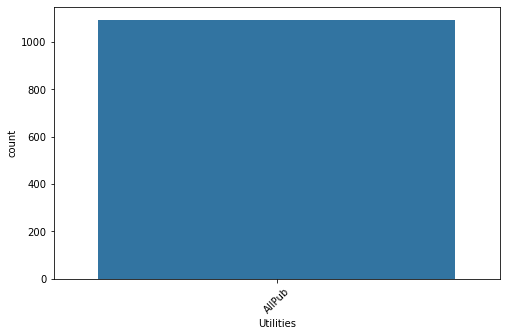

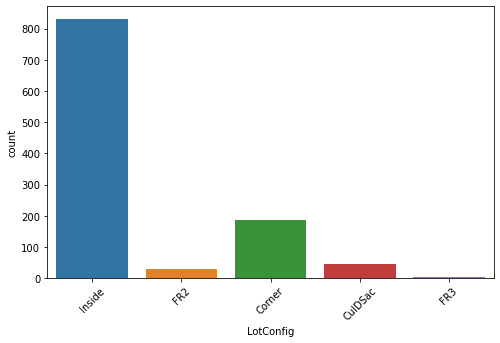

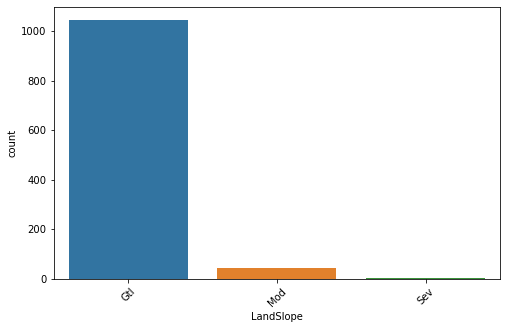

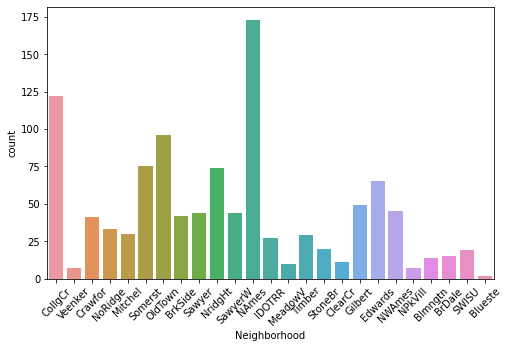

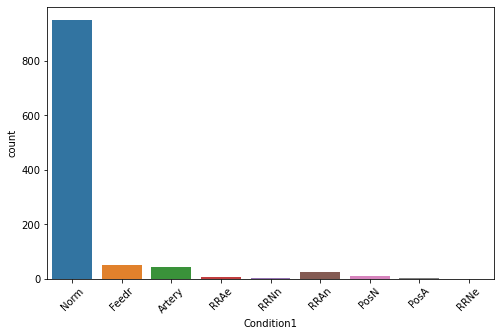

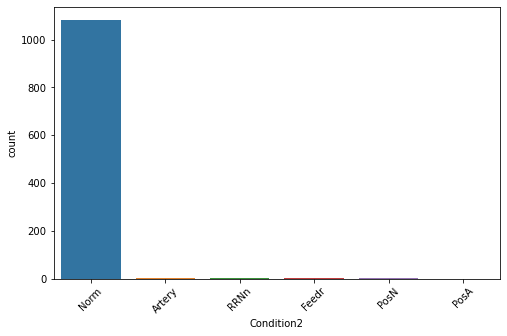

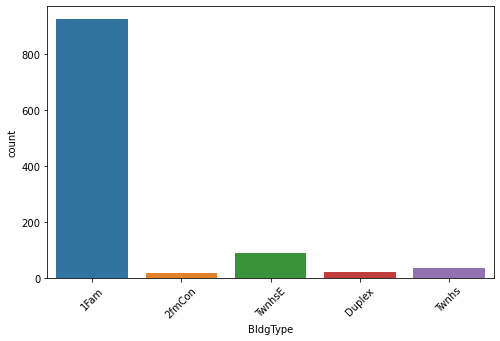

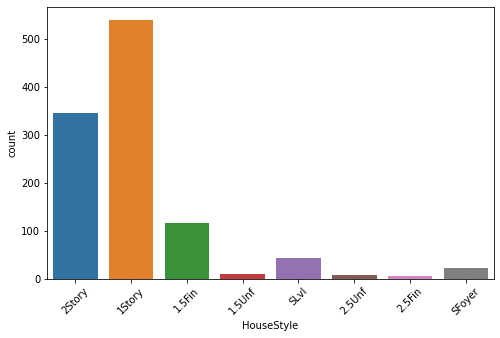

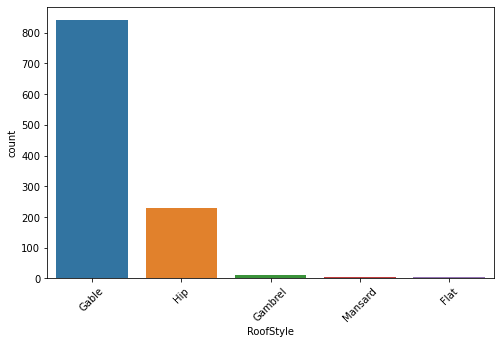

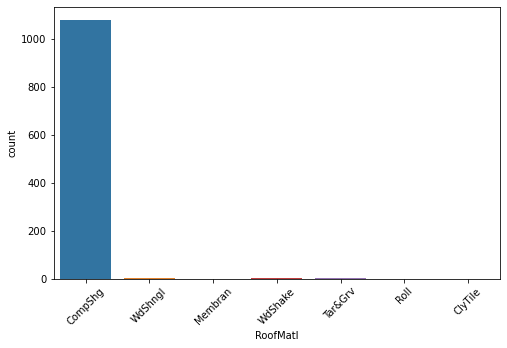

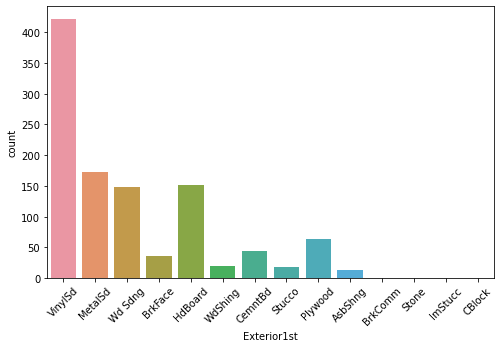

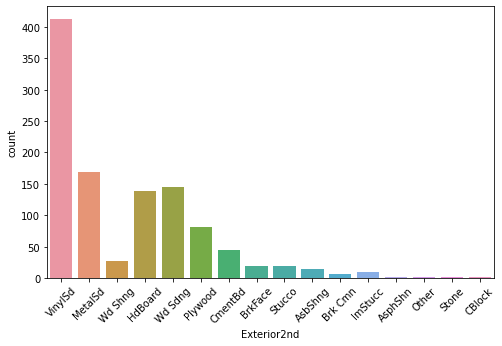

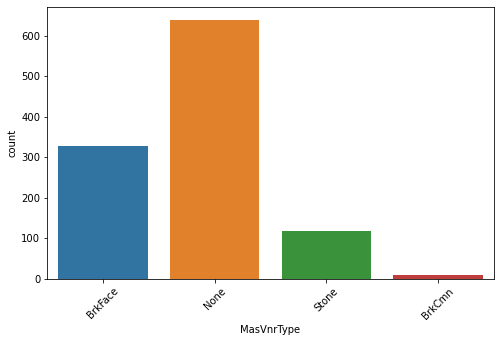

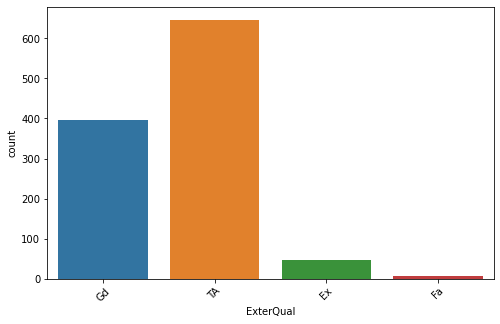

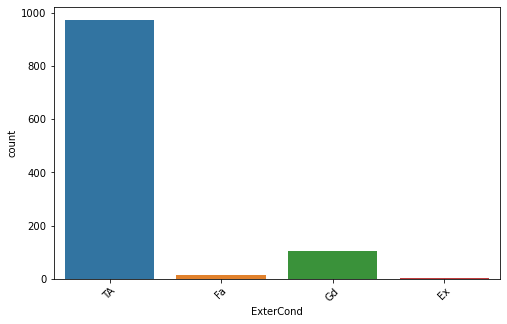

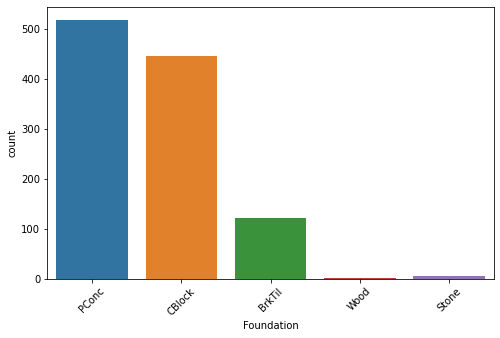

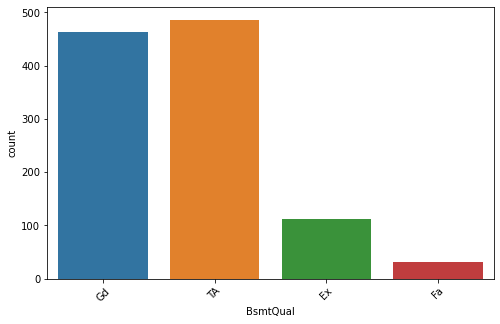

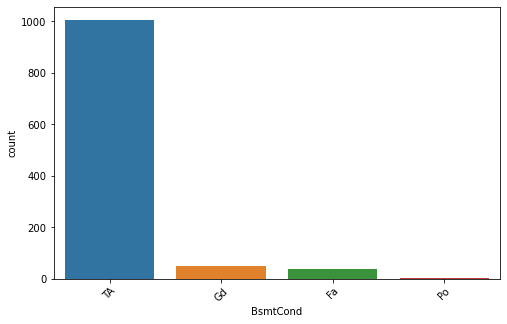

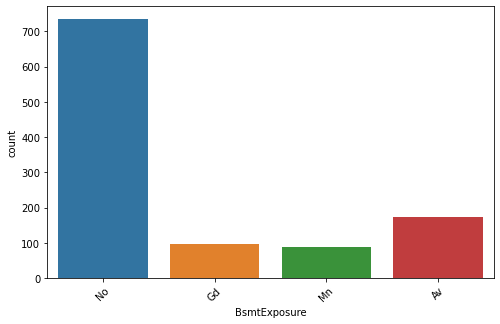

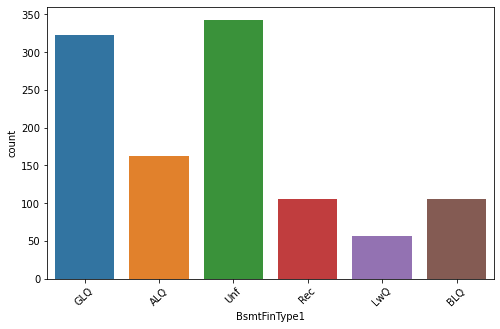

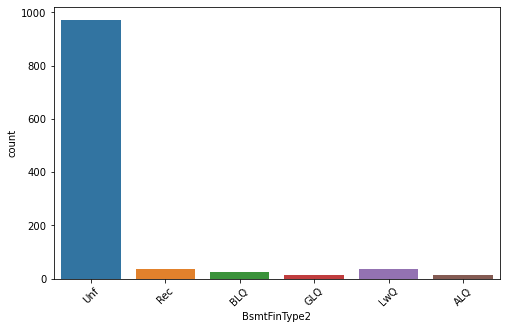

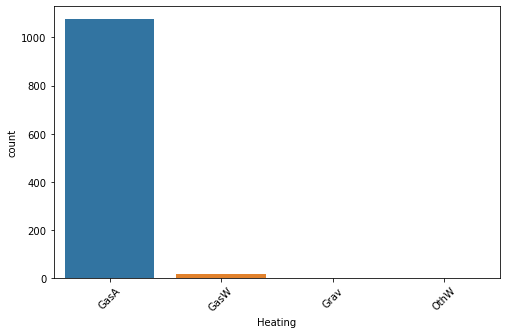

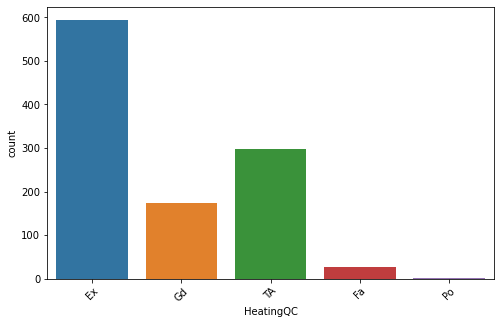

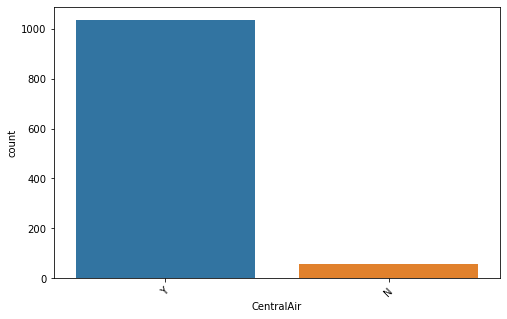

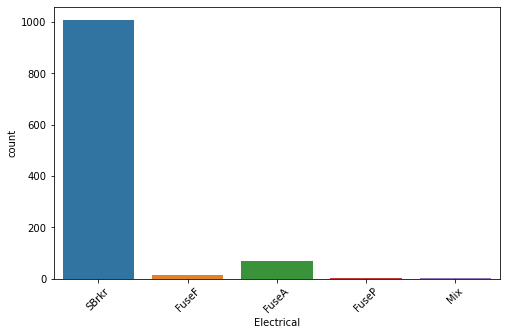

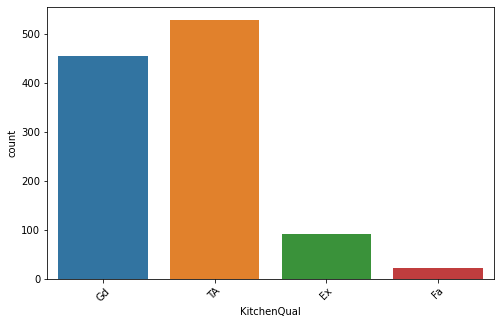

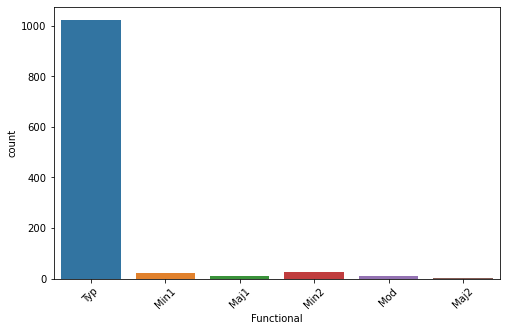

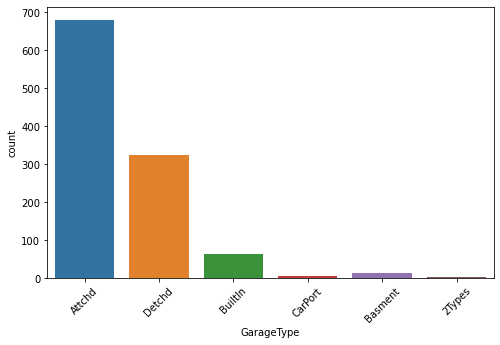

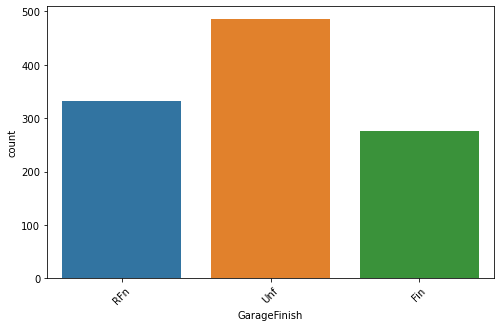

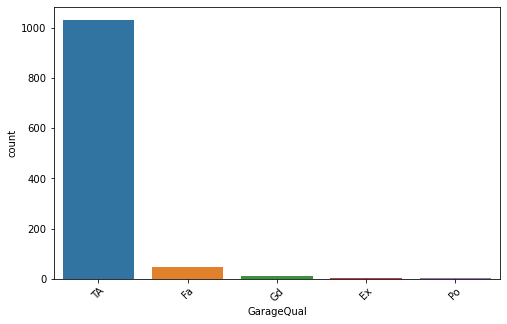

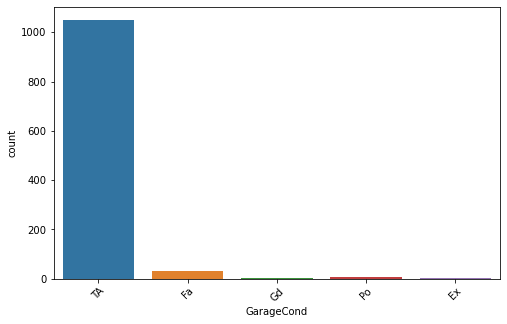

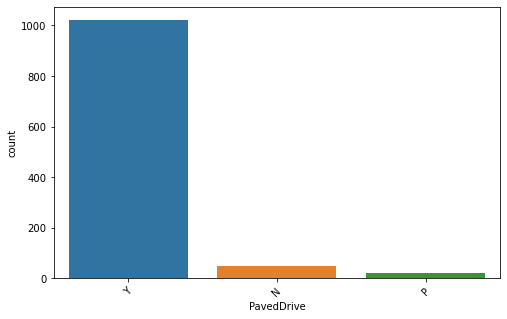

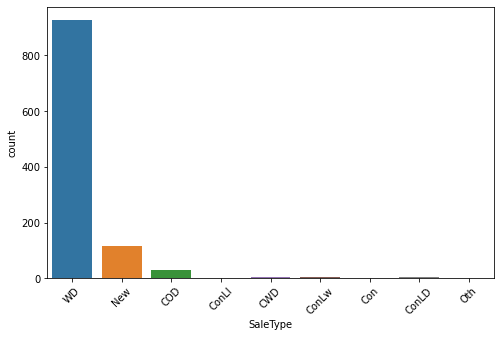

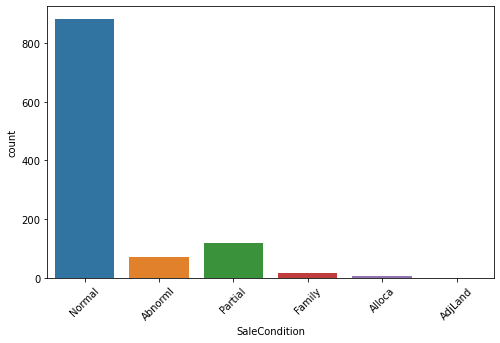

In [24]:

for col in house_1_Obj.columns.array:
    plt.figure(figsize=(8,5))
    sns.countplot(house_1_Obj[col])
    plt.xticks(rotation=45)
    plt.show()

We can clearly see some independent variable values are biased towards one value. Keeping such variables in the data will not be beneficial for analysis. We are dropping it from our dataset.

In [25]:
house_1_Obj.drop(['Street','LandContour', 'Utilities','LandSlope', 'Condition1', 'Condition2', 'BldgType','RoofMatl',
             'ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir', 'Electrical','Functional',
             'GarageQual', 'GarageCond', 'PavedDrive','SaleType','SaleCondition'], axis=1, inplace=True)

In [26]:
house_1_Obj.shape

(1094, 18)

Lets analyse numeric variables

In [27]:
house_1_numeric = house_1.select_dtypes(['float64','int64'])

In [28]:
house_1_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

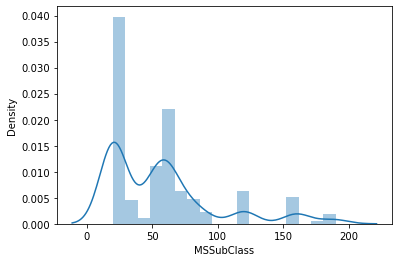

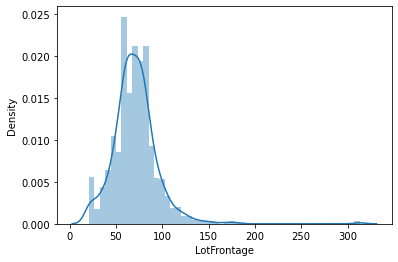

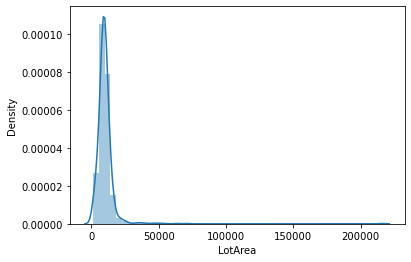

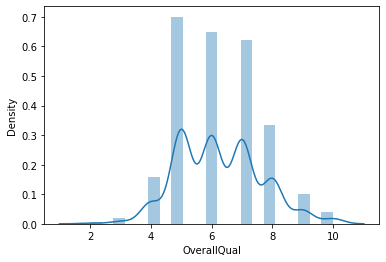

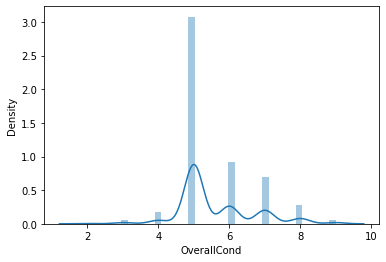

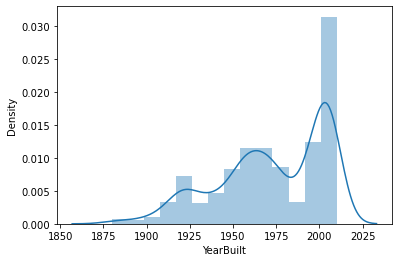

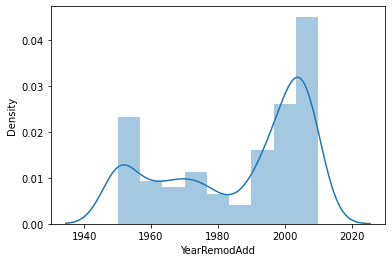

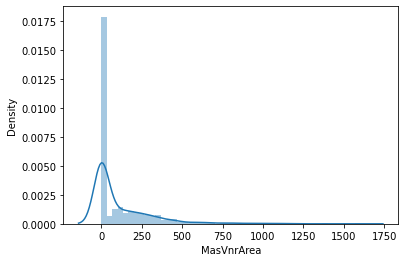

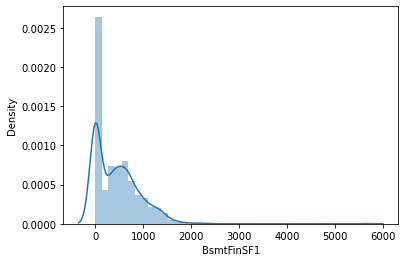

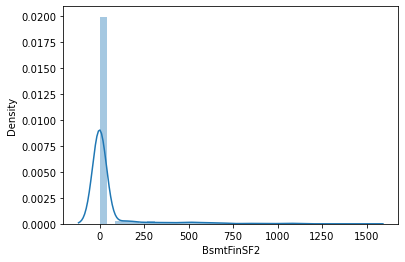

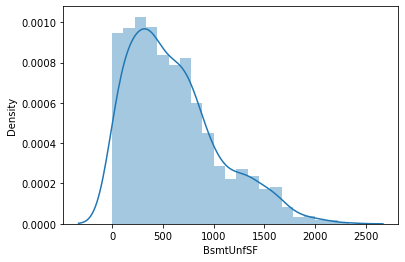

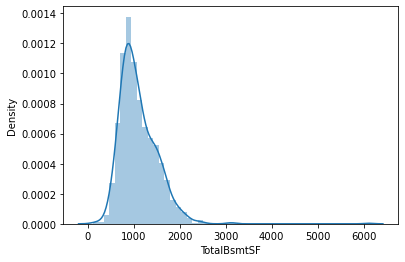

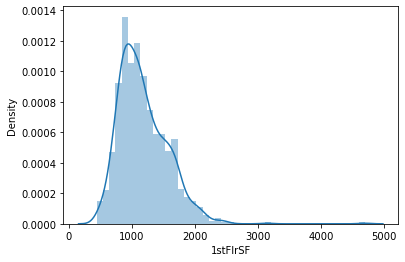

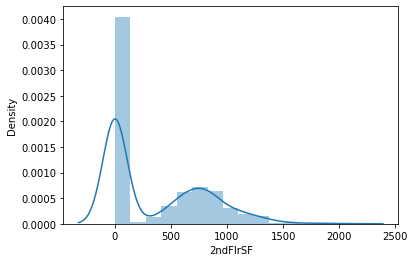

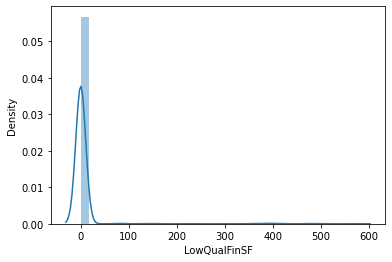

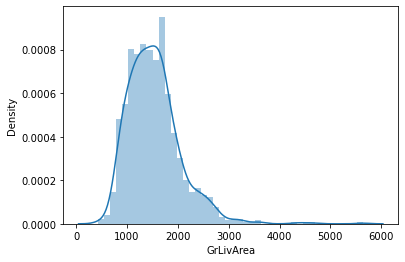

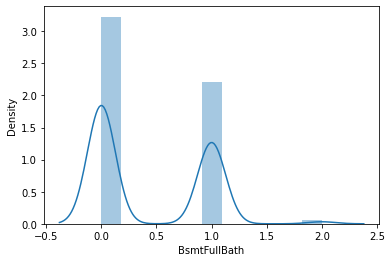

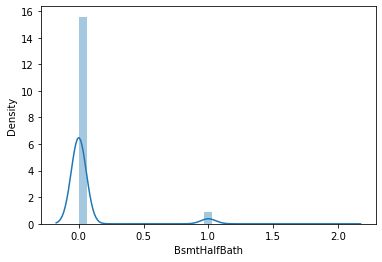

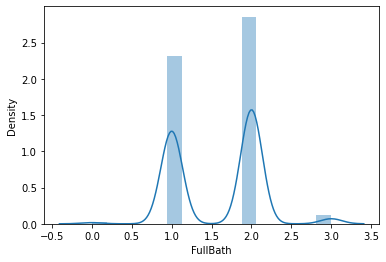

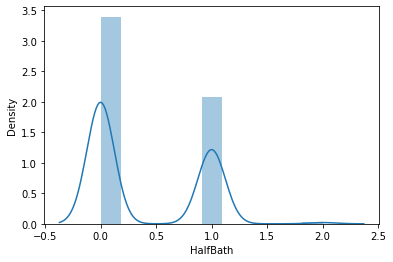

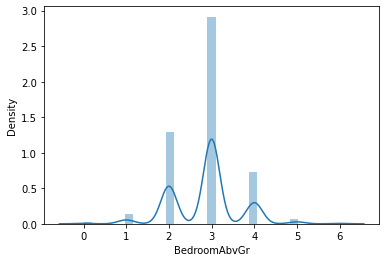

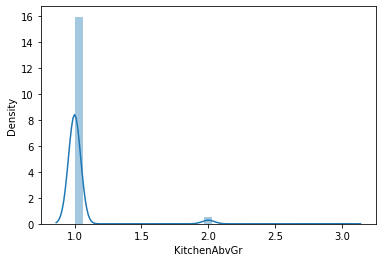

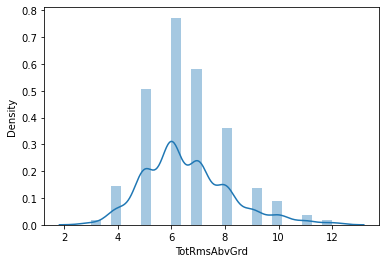

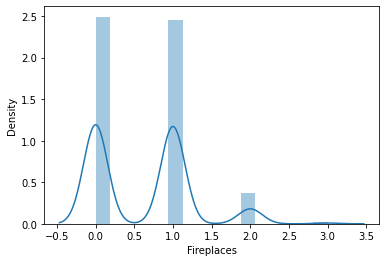

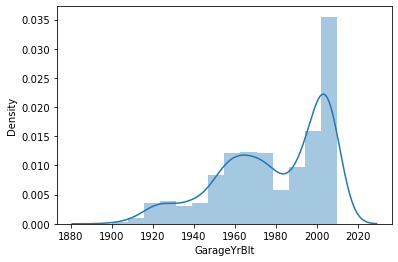

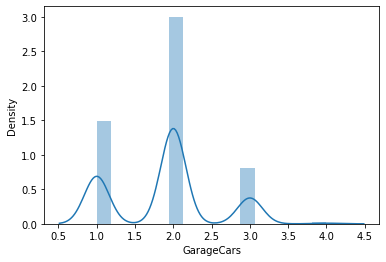

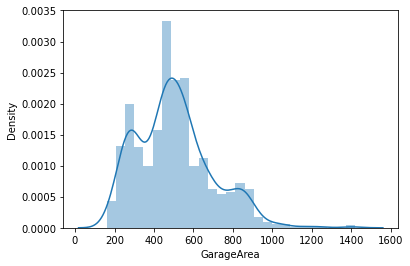

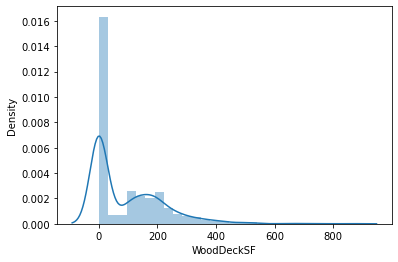

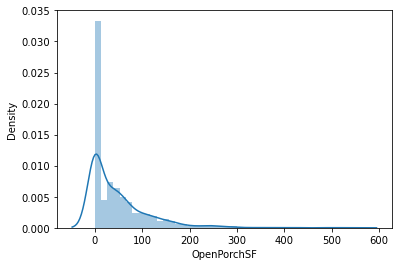

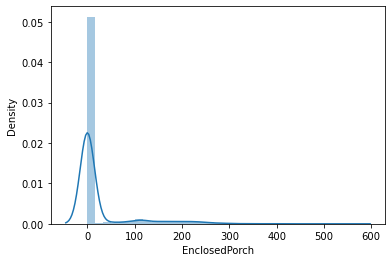

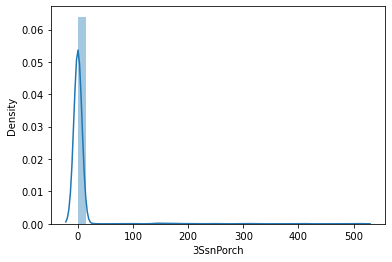

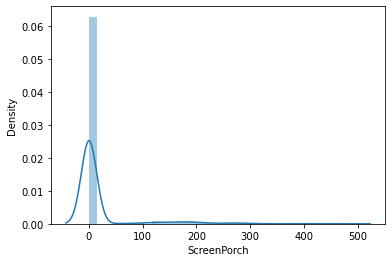

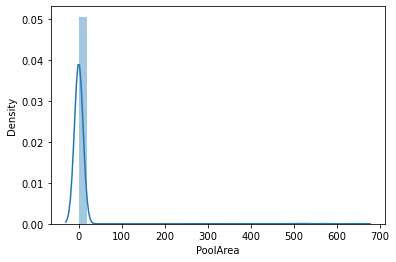

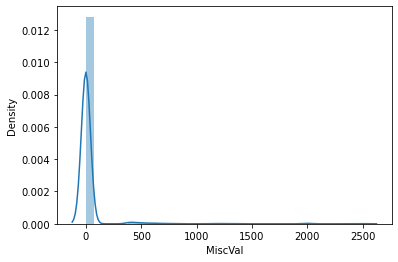

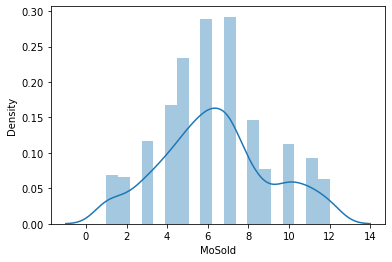

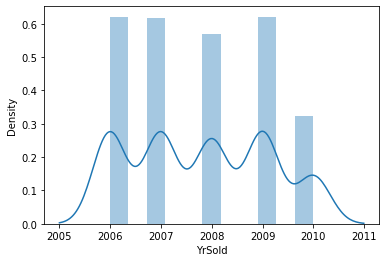

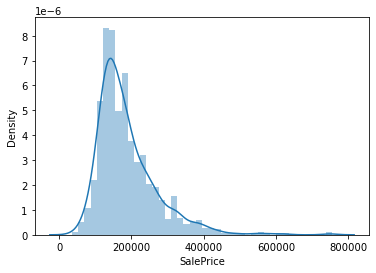

In [29]:
for col in house_1_numeric.columns.array:
    sns.distplot(house_1_numeric[col])
    plt.show()

From above graphs, we could identify some of the numeric variables are actually categorical variables and cannot be used to find correlation using heatmap. Hence, we will drop them from numeric dataset. We will analyse this dropped columns later in the solution.

In [30]:
discrete_numeric = ['OverallQual', 'OverallCond','BsmtFullBath', 
                      'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
                      'Fireplaces', 'GarageCars', 'MoSold']

In [31]:
house_1_numeric.drop(discrete_numeric, 
                     axis=1,
                    inplace=True)

In [32]:
house_1_numeric.shape

(1094, 25)

In [33]:
corr_mat = house_1_numeric.corr()

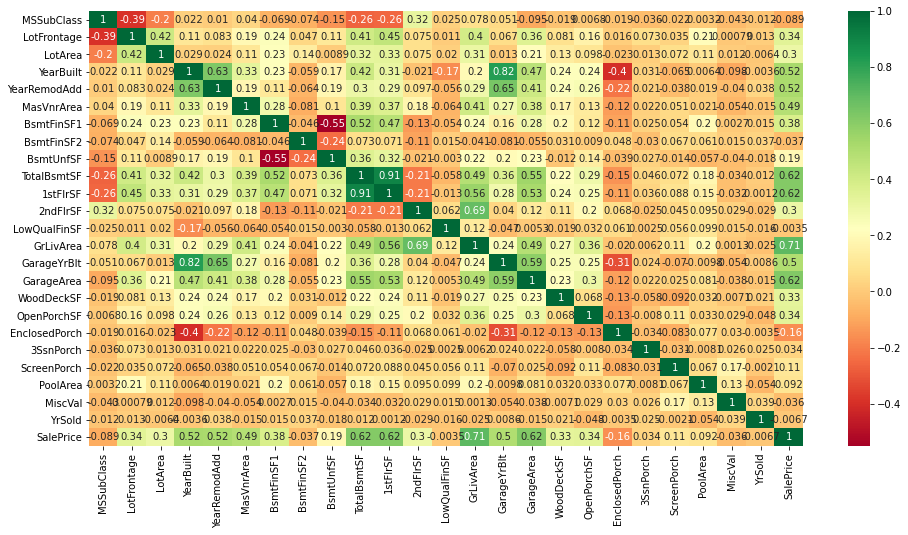

In [34]:
plt.figure(figsize=(16,8))
sns.heatmap(corr_mat, cmap="RdYlGn", annot=True)
plt.show()

Above heatmap explain correlation between different variables.
* We know that target variable is SalePrice and rest all are independent variables *

Correlation of SalePrice with independent variables:
1. SalePrice is positively correlated with GrLvArea, 1stFlrSF, TotalBsmtSF
2. SalePrice is negatively correlated with EnclosedPorch

Correlation between independent variables:
In the heatmap, we can definetly see some correlation between independent variables. That means multicollinearity exists in the dataset and should be taken care of while building the model.

Since our target variable is a numeric ones, we will use Linear Regression to build our model.


Let us check for linearity using scatter plots for the numeric variables.

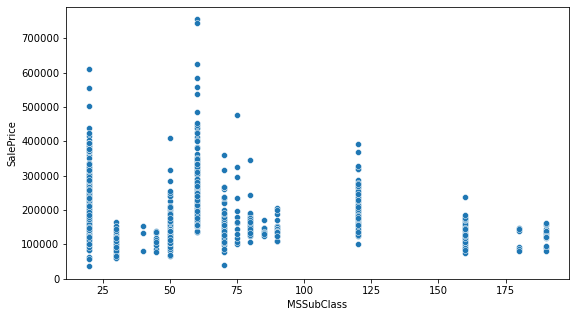

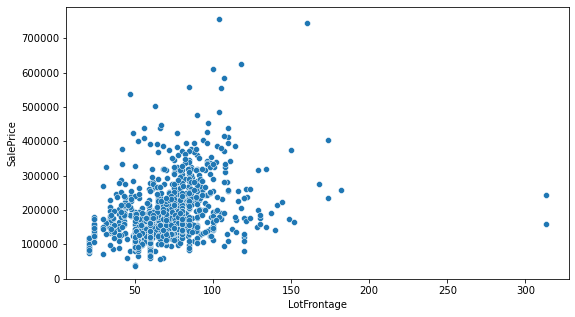

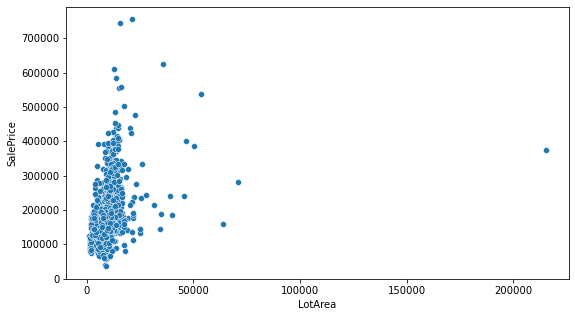

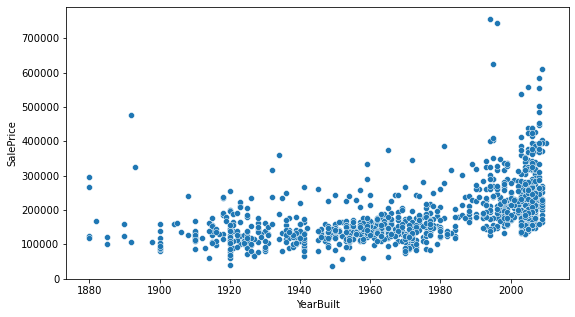

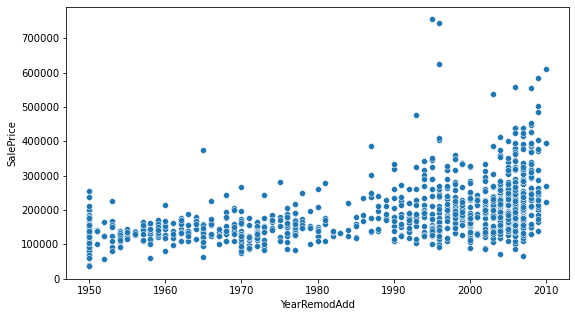

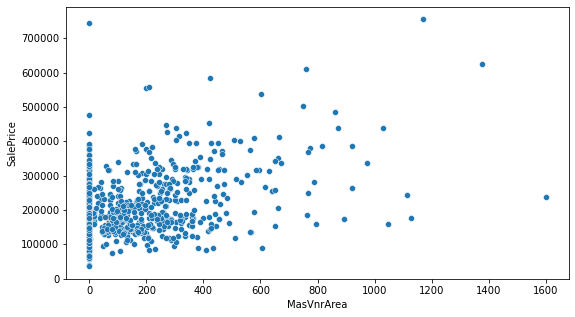

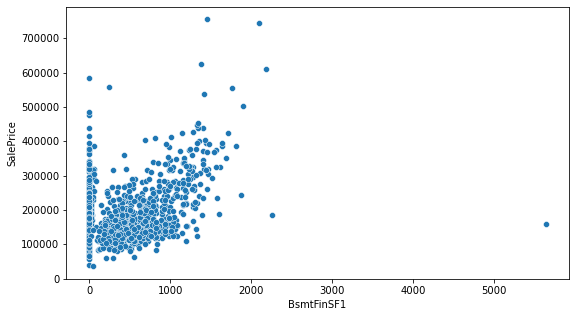

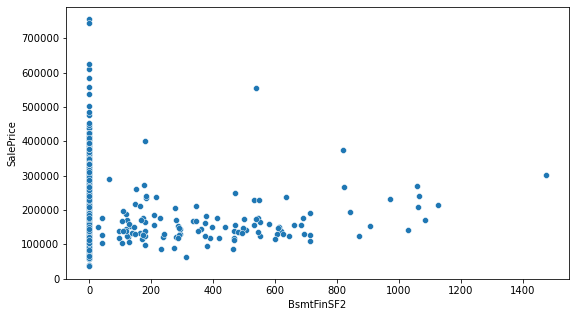

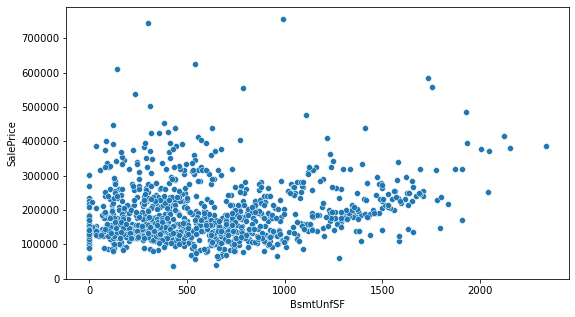

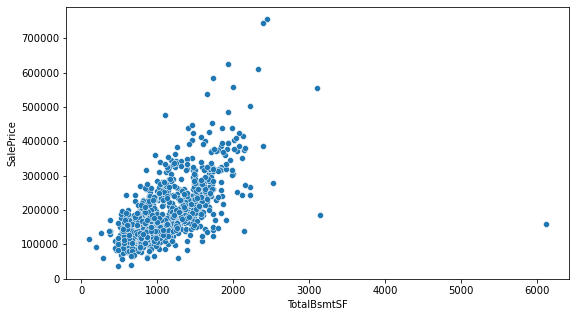

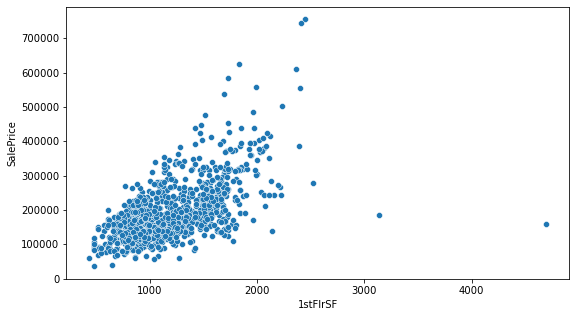

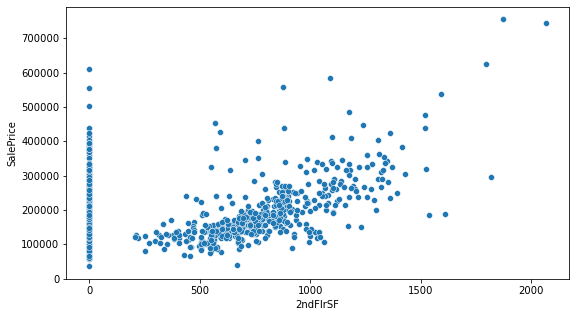

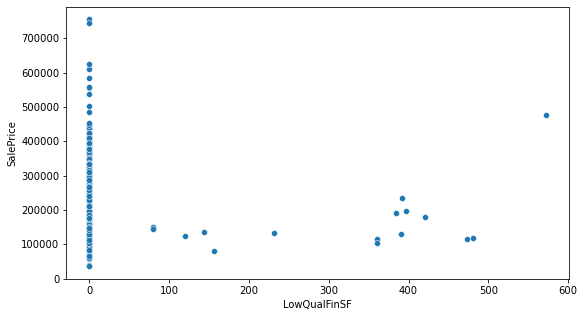

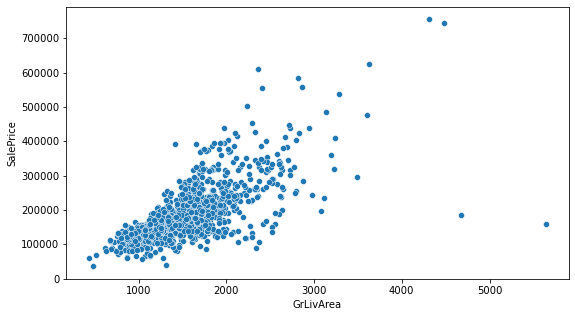

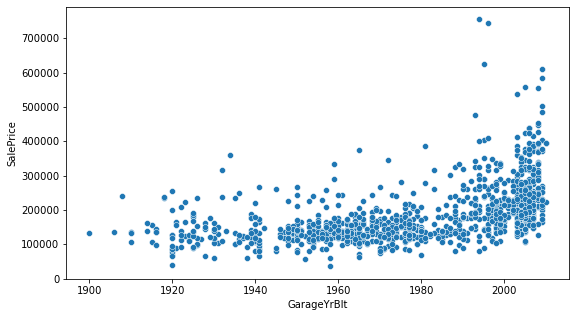

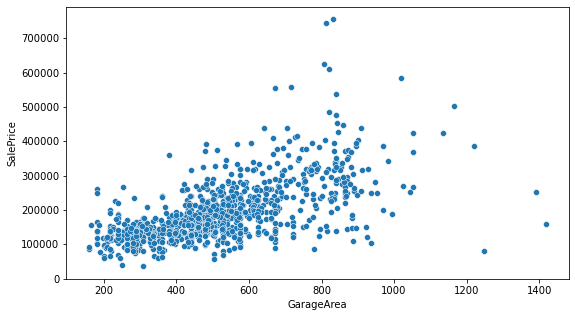

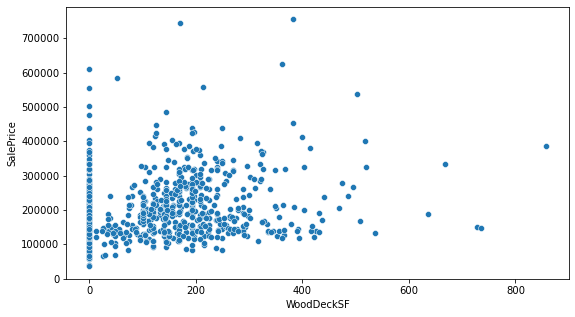

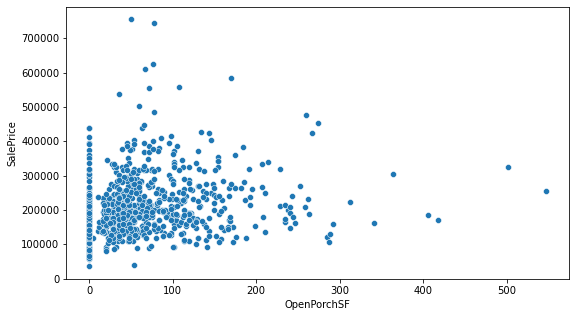

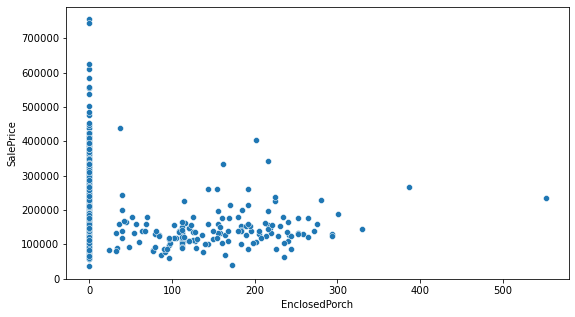

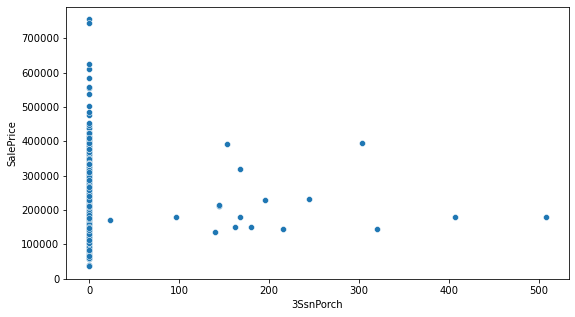

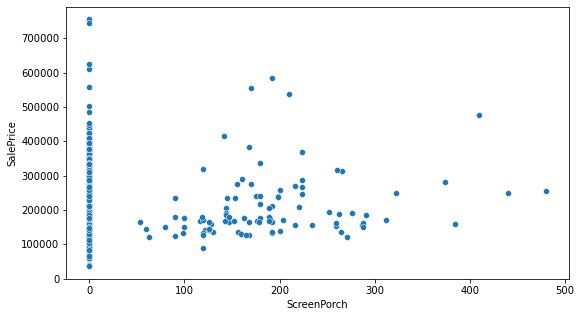

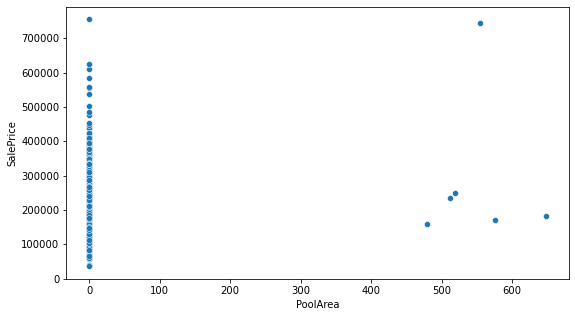

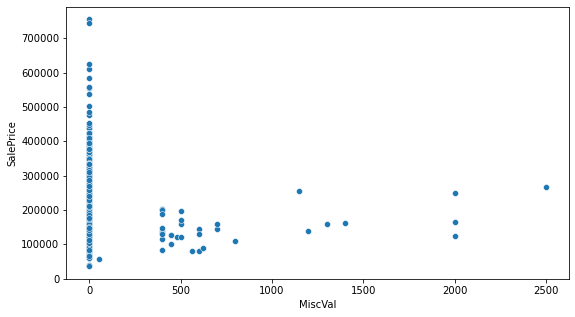

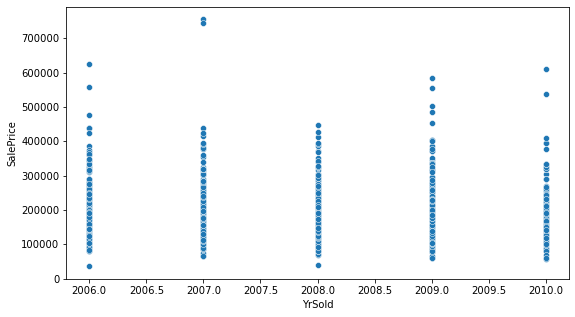

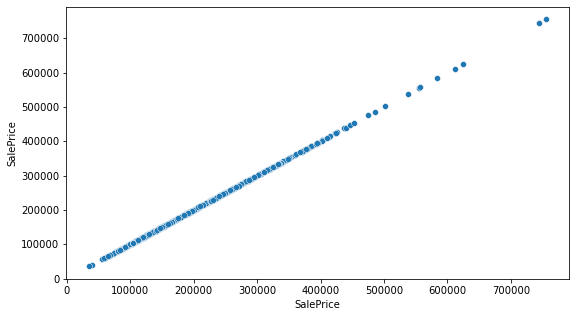

In [35]:
for col in house_1_numeric.columns.array:
    plt.figure(figsize=(9,5))
    sns.scatterplot(x=col,y='SalePrice',data=house_1_numeric)
    plt.show()

From above scatter plots, we are able to see a linear pattern in some of the independent variables.

Lets us analyze columns having discrete numerical categories assigned to them

In [36]:
house_1_cat = house_1[discrete_numeric]

In [37]:
house_1_cat.head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,2
1,6,8,0,1,2,0,3,1,6,1,2,5
2,7,5,1,0,2,1,3,1,6,1,2,9
3,7,5,1,0,1,0,3,1,7,1,3,2
4,8,5,1,0,2,1,4,1,9,1,3,12


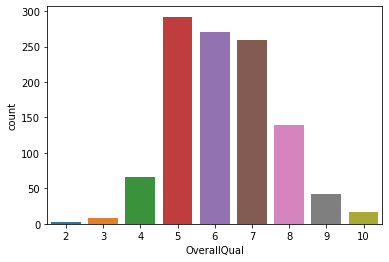

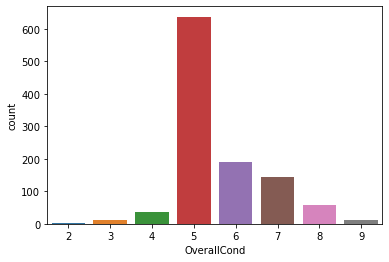

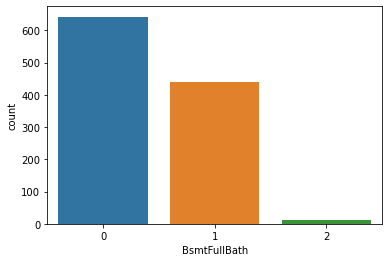

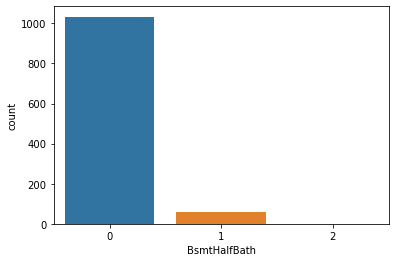

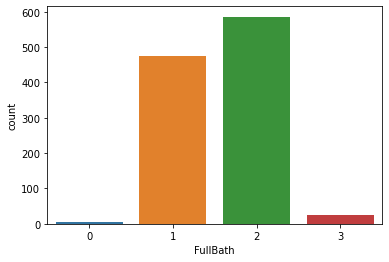

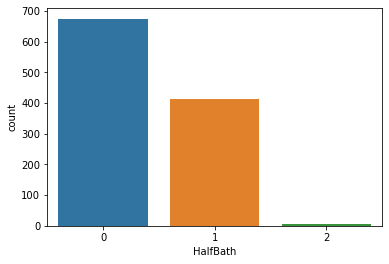

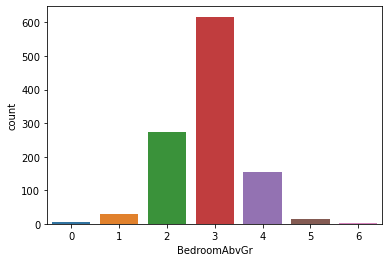

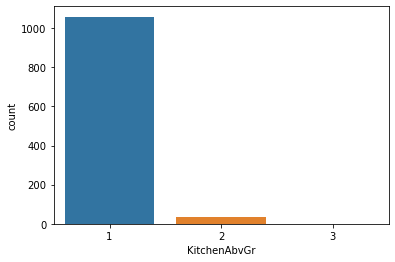

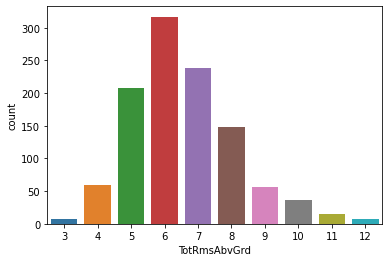

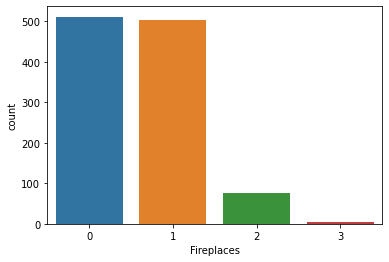

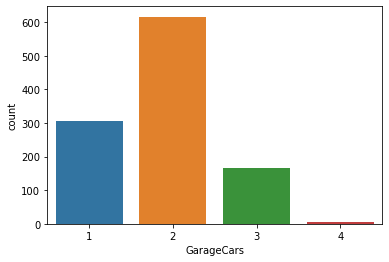

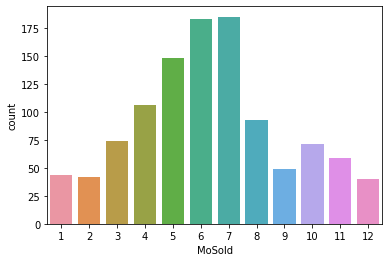

In [38]:
for col in house_1_cat.columns.array:
    sns.countplot(house_1_cat[col])
    plt.show()

It will not make sense keeping KitchenAbvGr variable, hence dropping it

In [39]:
house_1_cat.drop(['KitchenAbvGr'], axis=1, inplace=True)
house_1_cat.shape

(1094, 11)

Lets concat all three datasets to form final dataset for model building

In [40]:
house_data = pd.concat([house_1_Obj, house_1_numeric, house_1_cat],
                      axis=1)

In [41]:
house_data.shape

(1094, 54)

In [42]:
house_data.head()

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,60,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0,0,2008,208500,7,5,1,0,2,1,3,8,0,2,2
1,RL,Reg,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,20,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0,0,2007,181500,6,8,0,1,2,0,3,6,1,2,5
2,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,60,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0,0,2008,223500,7,5,1,0,2,1,3,6,1,2,9
3,RL,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf,70,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,0,0,2006,140000,7,5,1,0,1,0,3,7,1,3,2
4,RL,IR1,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn,60,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0,0,2008,250000,8,5,1,0,2,1,4,9,1,3,12


## Data Preparation

In [43]:
y_vars = house_data.pop('SalePrice')
X_vars = house_data

In [44]:
y_vars.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [45]:
X_vars.head()

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,60,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0,0,2008,7,5,1,0,2,1,3,8,0,2,2
1,RL,Reg,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,20,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0,0,2007,6,8,0,1,2,0,3,6,1,2,5
2,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,60,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0,0,2008,7,5,1,0,2,1,3,6,1,2,9
3,RL,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf,70,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,0,0,2006,7,5,1,0,1,0,3,7,1,3,2
4,RL,IR1,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn,60,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0,0,2008,8,5,1,0,2,1,4,9,1,3,12


In [46]:
X_vars.shape

(1094, 53)

In [47]:
category_columns = list(house_1_Obj.columns.array)
category_columns

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish']

In [48]:
X_vars[category_columns].head()

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn
1,RL,Reg,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn
2,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn
3,RL,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf
4,RL,IR1,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn


In [49]:
house_dummies = pd.get_dummies(X_vars[category_columns], drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [50]:
X_vars.drop(category_columns, 
            axis=1,
            inplace=True)

In [51]:
X_vars.shape

(1094, 35)

In [52]:
X_vars = pd.concat([X_vars, house_dummies], axis=1)
X_vars.shape

(1094, 144)

Scaling the variables using sklearn scale function

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X_vars))
X.columns = X_vars.columns

In [55]:
X.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
0,0.235294,0.150685,0.033420,0.946154,0.883333,0.12250,0.125089,0.0,0.064212,0.125062,0.098260,0.413559,0.0,0.244427,0.936364,0.308426,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.50,0.625,0.428571,0.5,0.0,0.666667,0.5,0.500000,0.555556,0.000000,0.333333,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.738462,0.433333,0.00000,0.173281,0.0,0.121575,0.192673,0.193700,0.000000,0.0,0.158340,0.690909,0.238474,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.25,0.500,0.857143,0.0,0.5,0.666667,0.0,0.500000,0.333333,0.333333,0.333333,0.363636,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.930769,0.866667,0.10125,0.086109,0.0,0.185788,0.135720,0.113305,0.419370,0.0,0.259032,0.918182,0.356121,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.50,0.625,0.428571,0.5,0.0,0.666667,0.5,0.500000,0.333333,0.333333,0.333333,0.727273,0.0,0.0,1.0,0.0,0.0

In [56]:
X.describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.0000

Split data into train and test set

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_vars, train_size=0.7, test_size=0.3, random_state=100)

In [58]:
X_train.shape, X_test.shape

((765, 144), (329, 144))

In [59]:
y_train.shape, y_test.shape

((765,), (329,))

## Model building and evaluation

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [61]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [62]:
lm.intercept_, lm.coef_

(1996041460827055.5,
 array([-3.44180106e+04, -1.26723892e+04,  1.65459174e+05,  7.41651898e+02,
         4.82318551e+03,  2.89946461e+04, -1.07291981e+17, -2.80206201e+16,
        -4.44071700e+16,  1.14154562e+17,  2.55764999e+17,  1.24154848e+17,
         3.43905923e+16, -3.12882242e+17,  1.31770000e+04, -2.82860000e+04,
         1.63427500e+04, -4.97200000e+03, -5.18500000e+02,  4.53555000e+04,
         2.53620000e+04,  1.46500000e+02, -5.82150000e+03, -4.82400000e+03,
         7.35060000e+04,  3.71590000e+04,  1.18100000e+04, -1.28656250e+02,
         3.33520000e+04,  8.62800000e+03, -6.56600000e+03, -8.51000000e+02,
         2.98200000e+03,  5.36800000e+04, -3.88500000e+02,  4.58315000e+04,
         2.47615000e+04,  3.40040000e+04,  2.93360000e+04,  8.10600000e+03,
        -6.03655000e+04, -3.20000000e+01,  2.64230000e+04, -1.02170000e+04,
        -1.85303125e+04,  3.72400000e+03, -1.20880000e+04, -4.64000000e+03,
        -4.19300000e+03, -1.56060000e+04, -1.42700000e+03,  1.55170

In [63]:
y_pred_train = lm.predict(X_train)

In [64]:
print(round(r2_score(y_train, y_pred_train)*100, 2), mean_squared_error(y_train, y_pred_train)/2)

90.15 337866348.9104984


In [65]:
y_pred_test = lm.predict(X_test)

In [66]:
r2_score(y_test, y_pred_test)

-3.8518879173204296e+19

#### Above indicates that linear model performs very badly on the test data. Though the R2 score for training data is 90%.

## Ridge Regression

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [68]:
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [69]:
ridge = Ridge()

In [70]:
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1
)

In [71]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
model_cv.best_params_

{'alpha': 5.0}

In [73]:
# fitting ridge model for alpha = 5
ridge = Ridge(alpha=5)
ridge.fit(X_train, y_train)

Ridge(alpha=5)

In [74]:
# printing penalized coefficients
ridge.coef_

array([-29146.66550649,   2623.53404305,  21695.28846769,   3463.20428801,
        13342.92256498,  26765.81533304,   9110.9881203 ,   8127.22042836,
         7883.54198168,  13624.96152067,  28441.22030137,  59758.80869529,
        14776.80783046,  48586.32305858,   4525.2920378 ,   7842.85965682,
        15691.35291116,   4360.71836961,  -5160.5238539 ,  13080.51808158,
        18434.96875513,   4579.34603869,  -3539.41143337,  -2994.90251868,
        58749.71616435,  26631.38892594,   9643.66598597,    895.19395162,
        37259.53057618,  11321.82276238,   7292.12317364,  29608.93373536,
        17098.1500394 ,  32638.20659109,   -425.39299776,  12610.41280965,
        -2927.93325212,   7568.37421738,   -269.48203625,  11165.25769581,
       -18919.0009905 ,  -3192.10162912,  20230.33865724,  -8944.53133412,
        -4680.07167232,    864.85727278,  -1111.45967858,  -1418.93366015,
         1410.72205042,  -7745.1838434 ,  -2604.33186973,  19958.32455323,
       -18865.26582773,  

In [75]:
#lets check how well this model fits
y_pred_train = ridge.predict(X_train)
ridge_r2_score_train = round(r2_score(y_train, y_pred_train)*100,2)

In [76]:
y_pred_test = ridge.predict(X_test)
ridge_r2_score_test = round(r2_score(y_test, y_pred_test)*100,2)

In [77]:
print("Train R2 score    :{0}\nTest  R2 score    :{1}\nDifference        :{2}".format( 
    ridge_r2_score_train,ridge_r2_score_test, ridge_r2_score_train-ridge_r2_score_test
))

Train R2 score    :88.24
Test  R2 score    :83.25
Difference        :4.989999999999995


#### We can see there has been a significant improvement in the r2 score of test data and also difference between r2 score of test and train data is 5% which is within acceptable limit.

In [78]:
ridge_mse_train = mean_squared_error(y_train, y_pred_train)**0.5
ridge_mse_test = mean_squared_error(y_test, y_pred_test)**0.5

In [79]:
# lets check RMSE for both
print("RMSE Train  :{0} \nRMSE Test   :{1}".format(ridge_mse_train, ridge_mse_test))

RMSE Train  :28405.682416170726 
RMSE Test   :34299.244887969486


In [80]:
metric_ridge = []
metric_ridge.append(ridge_r2_score_train)
metric_ridge.append(ridge_r2_score_test)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric_ridge.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric_ridge.append(rss2_lr)

metric_ridge.append(ridge_mse_train)
metric_ridge.append(ridge_mse_test)

metric_ridge

[88.24,
 83.25,
 617265337049.1884,
 387048167762.13245,
 28405.682416170726,
 34299.244887969486]

## Lasso Regression

In [81]:
from sklearn.linear_model import Lasso

In [82]:
lasso = Lasso()

In [83]:
folds = 5
model_cv_lasso = GridSearchCV(estimator=lasso,
                             param_grid=params,
                             scoring='neg_mean_absolute_error',
                             return_train_score=True,
                             verbose=1,
                             cv=folds)

In [84]:
model_cv_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
model_cv_lasso.best_params_

{'alpha': 100}

In [86]:
# fitting Lasso model for alpha = 100
lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [87]:
# printing penalized coefficients for Lasso
lasso.coef_

array([-2.83939773e+04, -0.00000000e+00,  5.84419431e+04,  4.23034240e+03,
        1.06039532e+04,  1.96664878e+04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.14961663e+04,
        4.96000875e+03,  1.74936554e+05,  2.50650719e+03, -0.00000000e+00,
        1.01917672e+04,  0.00000000e+00, -1.26158611e+03,  7.23126911e+01,
        1.82221663e+04,  0.00000000e+00, -0.00000000e+00, -2.22536726e+03,
        9.18735310e+04,  3.32164025e+04,  8.61256879e+03,  0.00000000e+00,
        3.30462300e+04,  5.44971474e+03, -0.00000000e+00,  5.83683769e+03,
        6.94718077e+03,  3.74977570e+04, -0.00000000e+00,  1.23853846e+04,
       -0.00000000e+00,  6.33688041e+03, -0.00000000e+00,  7.93417803e+03,
       -2.96337583e+04, -1.22498096e+03,  2.11105375e+04, -4.68609611e+03,
       -0.00000000e+00,  1.69910527e+03, -0.00000000e+00,  0.00000000e+00,
        2.31282522e+03, -0.00000000e+00,  2.03728835e+03,  2.07759149e+04,
       -1.32814524e+04, -

#### We can see that many coefficients are changed to 0

In [88]:
# lets calculate metrics to check the model accuracy
y_pred_train = lasso.predict(X_train)
lasso_r2_score_train = round(r2_score(y_train, y_pred_train)*100, 2)

In [89]:
y_pred_test = lasso.predict(X_test)
lasso_r2_score_test = round(r2_score(y_test, y_pred_test)*100, 2)

In [90]:
print("Train R2 score    :{0}\nTest  R2 score    :{1}\nDifference        :{2}".format( 
    lasso_r2_score_train,lasso_r2_score_test, lasso_r2_score_train-lasso_r2_score_test
))

Train R2 score    :88.73
Test  R2 score    :83.07
Difference        :5.660000000000011


#### Even in case of Lasso, model performs well on both the test and train data. Her, the difference is around 5.6% which is still acceptable.

In [91]:
lasso_mse_train = mean_squared_error(y_train, y_pred_train)**0.5
lasso_mse_test = mean_squared_error(y_test, y_pred_test)**0.5

In [92]:
# lets check RMSE for both
print("RMSE Train  :{0} \nRMSE Test   :{1}".format(lasso_mse_train, lasso_mse_test))

RMSE Train  :27801.596125826807 
RMSE Test   :34481.285504139145


In [93]:
metric_lasso = []
metric_lasso.append(lasso_r2_score_train)
metric_lasso.append(lasso_r2_score_test)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric_lasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric_lasso.append(rss2_lr)

metric_lasso.append(lasso_mse_train)
metric_lasso.append(lasso_mse_test)

metric_lasso

[88.73,
 83.07,
 591290491564.8448,
 391167527455.9077,
 27801.596125826807,
 34481.285504139145]

In [94]:
# Creating a table which contain all the metrics

lm_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }
lm_metric = pd.DataFrame(lm_table ,columns = ['Metric'] )

ridge_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
lasso_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([ lm_metric, ridge_metric, lasso_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.824000e+01,8.873000e+01
1,R2 Score (Test),8.325000e+01,8.307000e+01
2,RSS (Train),6.172653e+11,5.912905e+11
3,RSS (Test),3.870482e+11,3.911675e+11
4,MSE (Train),2.840568e+04,2.780160e+04
5,MSE (Test),3.429924e+04,3.448129e+04


### Comparison between Lasso and Ridge for this problem
- We can see that Ridge model performs slightly better than the Lasso model for this particular problem

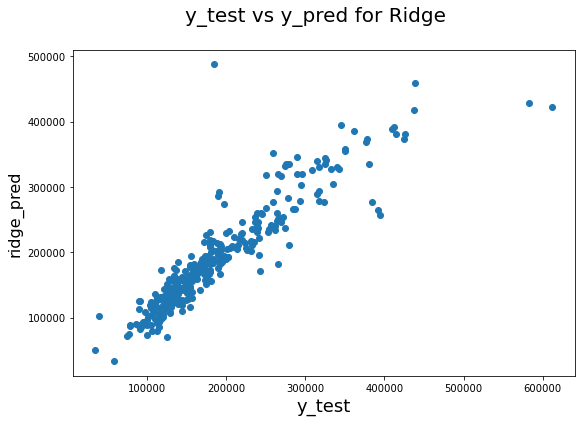

In [95]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
y_pred_ridge = ridge.predict(X_test)

fig = plt.figure(figsize=[9,6])
plt.scatter(y_test,y_pred_ridge)

fig.suptitle('y_test vs y_pred for Ridge', fontsize=20)               # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  

plt.show()

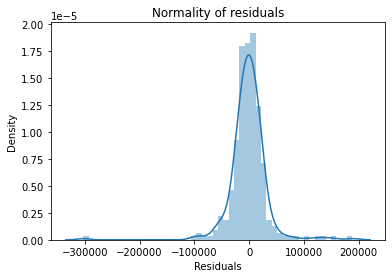

In [96]:
# checking for distribution of residuals
y_res=y_test-y_pred_ridge
sns.distplot(y_res,kde=True)
plt.title('Normality of residuals')
plt.xlabel("Residuals")
plt.show()

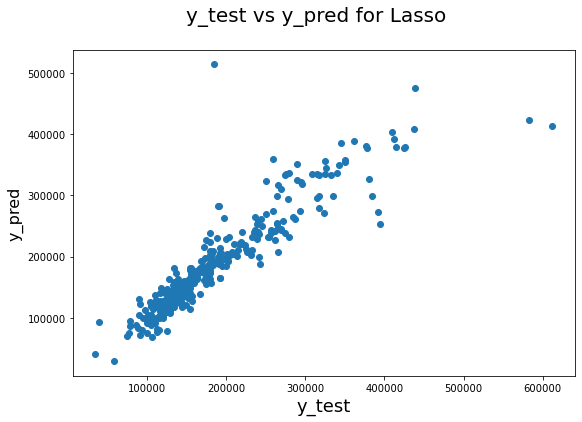

In [97]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
y_pred_lasso = lasso.predict(X_test)

fig = plt.figure(figsize=[9,6])
plt.scatter(y_test,y_pred_lasso)

fig.suptitle('y_test vs y_pred for Lasso', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

plt.show()

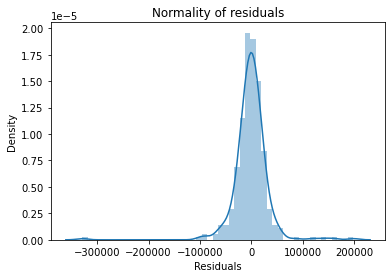

In [98]:
# checking for distribution of residuals
y_res=y_test-y_pred_lasso
sns.distplot(y_res,kde=True)
plt.title('Normality of residuals')
plt.xlabel("Residuals")
plt.show()

We can see that both are following normal distribution

In [99]:
# coefficients comparison for Ridge and Lasso
betas = pd.DataFrame(index=X.columns, 
                     columns = ['Ridge', 'Lasso'])
betas['Ridge'] = ridge.coef_ # Ridge Regression
betas['Lasso'] = lasso.coef_ # Lasso Regression
betas.sort_values(by=['Lasso'], ascending=False)

,Ridge,Lasso
GrLivArea,48586.323059,174936.553935
OverallQual,58749.716164,91873.530953
2ndFlrSF,59758.808695,61496.166339
Neighborhood_NoRidge,54550.421904,60988.629006
LotArea,21695.288468,58441.943114
Neighborhood_StoneBr,38290.842592,51106.490013
GarageCars,32638.206591,37497.757039
OverallCond,26631.388926,33216.402490
FullBath,37259.530576,33046.230009
BsmtExposure_Gd,22942.551816,22752.957242


Q.1 Solution

In [100]:
# changing alpha for Ridge from 5 to 10
ridge_10 = Ridge(alpha=10)
ridge_10.fit(X_train, y_train)

Ridge(alpha=10)

In [101]:
y_pred_train = ridge_10.predict(X_train)
y_pred_test = ridge_10.predict(X_test)

metric_1 = []
metric_1.append(r2_score(y_train, y_pred_train))
metric_1.append(r2_score(y_test, y_pred_test))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric_1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric_1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric_1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric_1.append(mse_test_lr**0.5)

metric_1

[0.8694547900543685,
 0.8348763978838796,
 685194148497.9943,
 381578055793.3496,
 29927.89042828736,
 34056.00857024535]

R2 score of train data has decreased but for test data it has very minimal increase

In [102]:
# changing alpha for Lasso from 100 to 200
lasso_200 = Lasso(alpha=200)
lasso_200.fit(X_train, y_train)

Lasso(alpha=200)

In [103]:
y_pred_train = lasso_200.predict(X_train)
y_pred_test = lasso_200.predict(X_test)

metric_1 = []
metric_1.append(r2_score(y_train, y_pred_train))
metric_1.append(r2_score(y_test, y_pred_test))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric_1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric_1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric_1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric_1.append(mse_test_lr**0.5)

metric_1

[0.8755528901609247,
 0.8334431459014341,
 653186980163.687,
 384890105057.7479,
 29220.526856243603,
 34203.49015491473]

R2 score of train data has decreased but for test data it has very minimal increase

In [104]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas['Ridge'] = ridge.coef_
betas['RidgeX2'] = ridge_10.coef_
betas['Lasso'] = lasso.coef_
betas['LassoX2'] = lasso_200.coef_
betas

,Ridge,RidgeX2,Lasso,LassoX2
MSSubClass,-29146.665506,-26283.408817,-28393.977272,-28079.608062
LotFrontage,2623.534043,4922.818647,-0.000000,-0.000000
LotArea,21695.288468,13487.050032,58441.943114,0.000000
YearBuilt,3463.204288,4697.117546,4230.342403,2932.464522
YearRemodAdd,13342.922565,14390.178627,10603.953226,12697.555123
MasVnrArea,26765.815333,22918.856485,19666.487771,10463.467899
BsmtFinSF1,9110.988120,9360.067475,0.000000,0.000000
BsmtFinSF2,8127.220428,5761.840937,0.000000,0.000000
BsmtUnfSF,7883.541982,7931.630391,0.000000,-0.000000
TotalBsmtSF,13624.961521,13297.162858,0.000000,0.000000


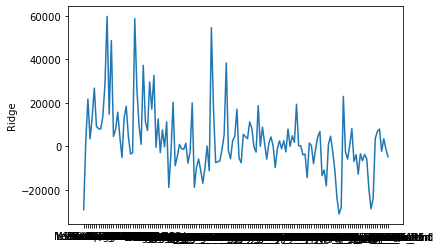

In [105]:
sns.lineplot(x=betas.index, y=betas['Ridge'])
plt.show()

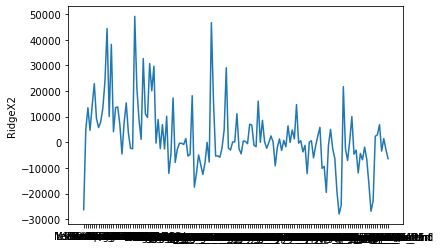

In [106]:
sns.lineplot(x=betas.index, y=betas['RidgeX2'])
plt.show()

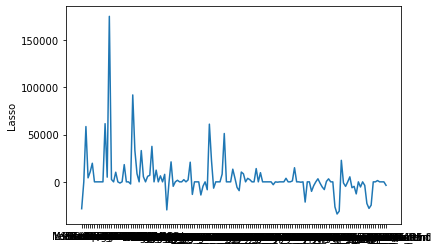

In [107]:
sns.lineplot(x=betas.index, y=betas['Lasso'])
plt.show()

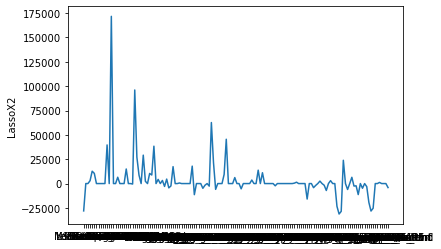

In [108]:
sns.lineplot(x=betas.index, y=betas['LassoX2'])
plt.show()

Not able to see much difference in the magnitude of coefficients, though there is slight decreases in the R2 score when lambda doubles.

Q.4. Solution

Five most important predictor variables based on the lasso regression coefficients are 
- GrLivArea 
- OverallQual
- 2ndFlrSF
- Neighborhood_NoRidge
- LotArea

In [109]:
betas.loc[['GrLivArea','OverallQual', '2ndFlrSF', 'Neighborhood_NoRidge', 'LotArea'],:]

,Ridge,RidgeX2,Lasso,LassoX2
GrLivArea,48586.323059,38217.831570,174936.553935,171704.574438
OverallQual,58749.716164,49172.734386,91873.530953,96083.321529
2ndFlrSF,59758.808695,44402.950569,61496.166339,39660.419895
Neighborhood_NoRidge,54550.421904,46696.821802,60988.629006,62663.626962
LotArea,21695.288468,13487.050032,58441.943114,0.000000


Removing the 5 most important factors and rebuilding the model using Lasso

In [110]:
X2_train = X_train.drop(['GrLivArea','OverallQual', '2ndFlrSF', 'Neighborhood_NoRidge', 'LotArea'], axis=1, inplace=False)

In [111]:
X2_train.shape

(765, 139)

In [112]:
X2_test = X_test.drop(['GrLivArea','OverallQual', '2ndFlrSF', 'Neighborhood_NoRidge', 'LotArea'], axis=1, inplace=False)

In [113]:
X2_test.shape

(329, 139)

In [114]:
lasso_1 = Lasso(alpha = 100)
lasso_1.fit(X2_train, y_train)

Lasso(alpha=100)

In [115]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso_1.predict(X2_train)
y_pred_test = lasso_1.predict(X2_test)

metric_1 = []
metric_1.append(r2_score(y_train, y_pred_train))
metric_1.append(r2_score(y_test, y_pred_test))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric_1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric_1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric_1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric_1.append(mse_test_lr**0.5)

metric_1

[0.8543343244404529,
 0.8027274817790816,
 764557110689.6752,
 455869802981.0444,
 31613.621426927122,
 37223.95064286085]

The difference between R2 score has increased slightly.

In [116]:
betas = pd.DataFrame(index=X2_train.columns)
betas['Lasso_1'] = lasso_1.coef_
betas.sort_values(by=['Lasso_1'], ascending=False)

,Lasso_1
1stFlrSF,122682.602442
HouseStyle_2.5Fin,83568.887759
MasVnrArea,83465.567865
FullBath,64695.566007
Exterior2nd_ImStucc,49665.261479
TotRmsAbvGrd,41904.506730
GarageCars,40480.346190
Neighborhood_StoneBr,38734.493667
OverallCond,36264.112098
LotConfig_CulDSac,23746.081937


#### The most important factors/predictors are:
- 1stFlrSF	
- HouseStyle_2.5Fin
- MasVnrArea
- FullBath
- Exterior2nd_ImStucc